In [12]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy import signal
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from xmitgcm import open_mdsdataset

In [13]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'
iters=[5000]
levels = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 
          73, 78, 83, 88, 93, 98,]
ds = open_mdsdataset(outdir, prefix=['dynVars'], levels=levels, iters=iters, chunks=None)
ds2 = open_mdsdataset(outdir2, prefix=['dynVars'], levels=levels, iters=iters, chunks=None)

In [14]:
depth_nob = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360
Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

#
omega = 7.3E-5 # mean f
N200 = 0.0071 # 1/s
N500 = 0.0036 # 1/s

#
z2 = 37 # Zl[37] = -197.2 m
z4 = 55 # Zl[55] = -508.2 m
dt = 10*60 # 10 min * 60 sec

# indices of virtual stations
pta = [100,180] 
ptb = [395,150]
ptc = [200,350]
ptd = [300,250]
colors = [ "#b75347", "#edc775", "#94b594", "#224b5e"]

In [15]:
times = np.arange(720)*600

In [16]:
# load vertical velocities at 4 virtual stations (previously saved)
var = np.load('../w_4stations.npz')

w max for station D is 2.141053e-06 m/s
w max for station A is 1.329059e-05 m/s
w max for station C is 2.326577e-06 m/s
w max for station B is 3.246963e-06 m/s


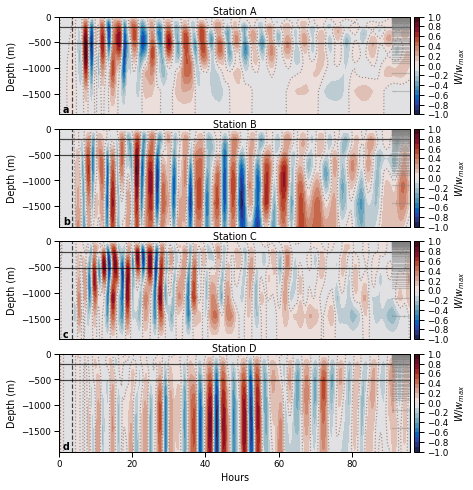

In [17]:
## === FIGURE 9 vertical velocity ===
sns.set_context('paper')
fig = plt.figure(figsize=(7.48,8))
gs0 = gridspec.GridSpec(4,1,  wspace=0.1, hspace=0.15)
ax1 = plt.subplot(gs0[0])
ax2 = plt.subplot(gs0[1])
ax3 = plt.subplot(gs0[2])
ax4 = plt.subplot(gs0[3])

for ax in [ax1,ax2,ax3]:
    ax.set_xticks([])

ax4.set_xlabel('Hours')

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_ylim(-1900,0)
    ax.set_xlim(0,96)

# -------- contourf w ---------------

for axx,st,pt,panel,stT in zip([ax4,ax1,ax3,ax2],
                               ['A','B','C','D'],
                               [pta,ptb,ptc,ptd],
                               ['d','a','c','b'], # This is not a mistake, order of stations was different
                               ['D','A','C','B']):
    varw = np.load('../wanom_tz_st%s.npz' %st) # load vertical velocity SVB-noSVB
    pc = axx.contourf(times/3600,Zl[:73],
                      np.transpose(varw["w_st%s" %st][:,:73]/np.max(abs(varw["w_st%s" %st][:,:73]))),
                      levels=np.linspace(-1,1,21),
                      cmap=cmo.cm.balance, 
                      vmin=-1, 
                      vmax=1)
    plt.colorbar(pc, ax=axx, label='$W/w_{max}$',pad=0.01, 
                 ticks=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
    pc = axx.contour(times/3600,Zl[:73],
                     np.transpose(varw["w_st%s" %st][:,:73]/np.max(abs(varw["w_st%s" %st][:,:73]))),
                     levels=[0], alpha=0.8,
                     linestyles=[':'],
                     colors=['0.5'])
    print('w max for station %s is %e m/s' %(stT,np.max(abs(varw["w_st%s" %st][:,:73]))))
    axx.set_title('Station %s' %stT, pad=0.01)
    axx.set_ylabel('Depth (m)')
    axx.axhline(-197, color='black', alpha=0.7)
    axx.axhline(-508, color='black', alpha=0.7)
    axx.axvline(3.5, color='black',linestyle='--', alpha=0.7)
    axx.text(0.01,0.02,panel, fontweight='bold',transform=axx.transAxes)
    for kk in Zl:
        axx.axhline(kk,xmin=0.95, xmax=1, color='0.5', alpha=0.4)
        
# save figure
plt.savefig('figure9_w.png', dpi=500, bbox_inches='tight')

dh max for station D is 4.924183e-01 cm
dh max for station A is 7.512721e+00 cm
dh max for station C is 1.522538e+00 cm
dh max for station B is 4.317217e+00 cm


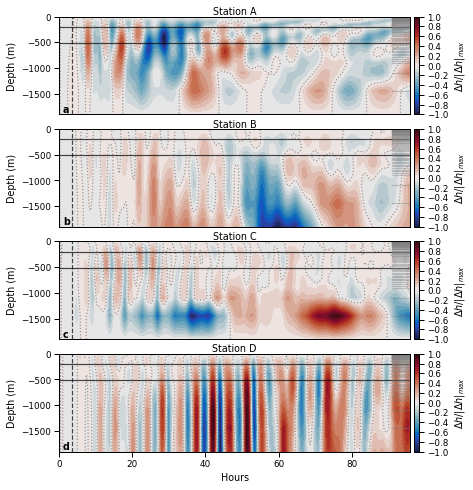

In [18]:
## === FIGURE 9 vertical displacement ===
sns.set_context('paper')
fig = plt.figure(figsize=(7.48,8))
gs0 = gridspec.GridSpec(4,1,  wspace=0.1, hspace=0.15)
ax1 = plt.subplot(gs0[0])
ax2 = plt.subplot(gs0[1])
ax3 = plt.subplot(gs0[2])
ax4 = plt.subplot(gs0[3])

for ax in [ax1,ax2,ax3]:
    ax.set_xticks([])

ax4.set_xlabel('Hours')

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_ylim(-1900,0)
    ax.set_xlim(0,96)

# -------- contourf w ---------------
for axx,st,pt,panel,stT in zip([ax4,ax1,ax3,ax2],
                               ['A','B','C','D'],
                               [pta,ptb,ptc,ptd],
                               ['d','a','c','b'], # This is not a mistake, order of stations was different
                               ['D','A','C','B']):
    varw = np.load('../wanom_tz_st%s.npz' %st) # load vertical velocity SVB-noSVB
    
    # Calculate displacement
    disp = np.zeros_like(varw["w_st%s" %st][:,:73])
    disp[:,:] = 100*np.cumsum(varw["w_st%s" %st][:,:73]*dt,axis=0) # dh in cm
    
    pc = axx.contourf(times/3600,Zl[:73],
                      np.transpose(disp/np.max(abs(disp))),
                      levels=np.linspace(-1,1,31),
                      cmap=cmo.cm.balance,
                      vmin=-1, 
                      vmax=1)
    plt.colorbar(pc, ax=axx, label='$\Delta h/|\Delta h|_{max}$',pad=0.01, 
                 ticks=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
    pc = axx.contour(times/3600,Zl[:73],
                     np.transpose(disp),
                     levels=[0], alpha=0.8,
                     linestyles=[':'],
                     colors=['0.5'])
    print('dh max for station %s is %e cm' %(stT,np.max(abs(disp))))
    axx.set_title('Station %s' %stT, pad=0.01)
    axx.set_ylabel('Depth (m)')
    axx.axhline(-197, color='black', alpha=0.7)
    axx.axhline(-508, color='black', alpha=0.7)
    axx.axvline(3.5, color='black',linestyle='--', alpha=0.7)
    axx.text(0.01,0.02,panel, fontweight='bold',transform=axx.transAxes)
    for kk in Zl:
        axx.axhline(kk,xmin=0.95, xmax=1, color='0.5', alpha=0.4)

# Save figure
plt.savefig('figure9.png', dpi=500, bbox_inches='tight')

0.987232
0.974759
1.056951
1.016141


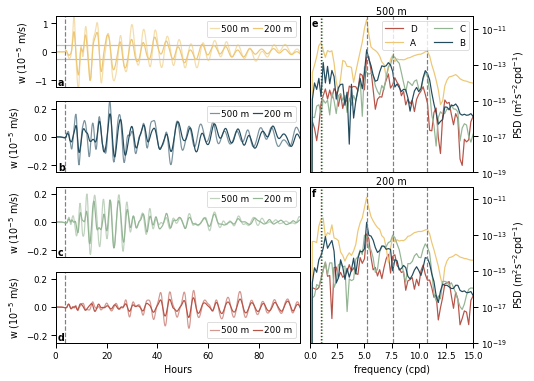

In [19]:
## === FIGURE 10, vertical velocity ===
fig = plt.figure(figsize=(7.48,6))
gs0 = gridspec.GridSpec(1,2, width_ratios=[1.5,1], wspace=0.05, hspace=0.15)
gs01 = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs0[1])
gs00 = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs0[0])
ax1 = plt.subplot(gs01[0:2])
ax1b = plt.subplot(gs01[2:])
ax2 = plt.subplot(gs00[0])
ax3 = plt.subplot(gs00[1])
ax4 = plt.subplot(gs00[2])
ax5 = plt.subplot(gs00[3])
for ax in [ax2,ax3,ax4]:
    ax.set_xticks([])

ax5.set_xlabel('Hours')

for ax in [ax3,ax4,ax5]:
    ax.set_xlim(0,96)
    ax.set_ylim(-.25,.25)
    ax.axvline(3.5, color='0.5', linestyle='--')
ax2.axvline(3.5, color='0.5', linestyle='--')
ax2.set_ylim(-1.25,1.25)
ax2.set_xlim(0,96)

# ---- time series ----
# plot w at station 0 (D) (in units 10^{-5} m/s)
ax5.plot(times[:]/3600, var['w500'][0,:]*1E5, label='500 m', 
        color=colors[0], alpha=0.6)
ax5.plot(times[:]/3600, var['w200'][0,:]*1E5, label='200 m', 
        color=colors[0], alpha=1)

# plot w at station 1 (A) (in units 10^{-5} m/s)
ax2.axhline(0.25,color='0.5', alpha=0.5)
ax2.axhline(-0.25,color='0.5', alpha=0.5)
ax2.plot(times[:]/3600, var['w500'][1,:]*1E5, label='500 m', 
        color=colors[1], alpha=0.6)
ax2.plot(times[:]/3600, var['w200'][1,:]*1E5, label='200 m', 
        color=colors[1], alpha=1)

# plot w at station 2 (C) (in units 10^{-5} m/s)
ax4.plot(times[:]/3600, var['w500'][2,:]*1E5, label='500 m', 
        color=colors[2], alpha=0.6)
ax4.plot(times[:]/3600, var['w200'][2,:]*1E5, label='200 m', 
        color=colors[2], alpha=1)

# plot w at station 3 (B) (in units 10^{-5} m/s)
ax3.plot(times[:]/3600, var['w500'][3,:]*1E5, label='500 m', 
        color=colors[3], alpha=0.6)
ax3.legend(ncol=2)
ax3.plot(times[:]/3600, var['w200'][3,:]*1E5, label='200 m', 
        color=colors[3], alpha=1)

for axx, lab in zip([ax2,ax3,ax4,ax5],['a','b','c','d']):
    axx.set_ylabel('w ($10^{-5}$ m/s)')
    axx.legend(ncol=2, handletextpad=0.2, columnspacing=0.5,handlelength=1 )
    axx.text(0.01,0.03,lab, fontweight='bold',transform=axx.transAxes)

# ----- spectra -------
fs = 1/600 # 10 min data
st_names=['D','A','C','B']
for st, st_name, col, ind in zip(range(4), st_names, colors, [pta,ptb,ptc,ptd]):
    
    fftFreq, signalPSD = signal.periodogram(var['w500'][st,:], fs) # w in m/s
    fftFreqb, signalPSDb = signal.periodogram(var['w200'][st,:],fs )

    ax1.plot(fftFreq*86400,signalPSD[:]/(86400),col,label=st_name) # PSD in (m/s)^2/cpd
    ax1b.plot(fftFreqb*86400,signalPSDb[:]/(86400),col,label=st_name)
      
    f = 86400*2*omega*np.sin(np.radians(lat[ind[1]]))/(2*np.pi) # f in cpd
    print('%f' %f)
    ax1.axvline(f, color=col, linestyle=':')
    ax1b.axvline(f, color=col, linestyle=':')

ax1.legend(ncol=2)
ax1.set_ylabel('PSD (m$^2$s$^{-2}$cpd$^{-1}$)')
ax1.set_xlim(0,15)
ax1.set_yscale('log')
ax1.set_ylim(1E-19, 5E-11)
ax1.set_title('500 m', pad=0)
ax1.set_xticks([])
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")

ax1b.set_xlabel('frequency (cpd)')
ax1b.set_ylabel('PSD (m$^2$s$^{-2}$cpd$^{-1}$)')
ax1b.set_xlim(0,15)
ax1b.set_yscale('log')
ax1b.set_ylim(1E-19, 5E-11)
ax1b.set_title('200 m', pad=0)
ax1b.yaxis.tick_right()
ax1b.yaxis.set_label_position("right")

for axx, lab in zip([ax1, ax1b], ['e','f']):
    axx.axvline(5.2, color='0.5', linestyle='--')
    axx.axvline(7.6, color='0.5', linestyle='--')
    axx.axvline(10.8, color='0.5', linestyle='--')
    axx.text(0.01,0.94,lab, fontweight='bold',transform=axx.transAxes)

# save figure 
plt.tight_layout()
plt.savefig('figure10_w.png', dpi=500, bbox_inches='tight')

0.987232
0.974759
1.056951
1.016141


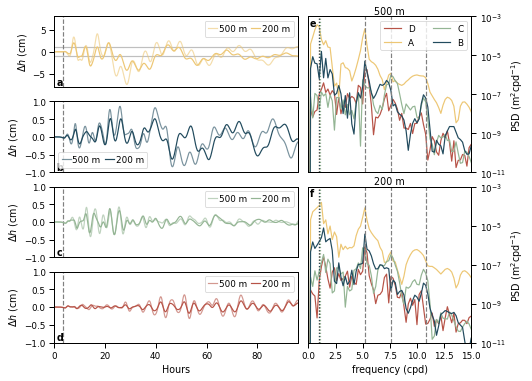

In [20]:
## === FIGURE 10, displacement ===
fig = plt.figure(figsize=(7.48,6))
gs0 = gridspec.GridSpec(1,2, width_ratios=[1.5,1], wspace=0.05, hspace=0.15)
gs01 = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs0[1])
gs00 = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs0[0])
ax1 = plt.subplot(gs01[0:2])
ax1b = plt.subplot(gs01[2:])
ax2 = plt.subplot(gs00[0])
ax3 = plt.subplot(gs00[1])
ax4 = plt.subplot(gs00[2])
ax5 = plt.subplot(gs00[3])

for ax in [ax2,ax3,ax4]:
    ax.set_xticks([])

ax5.set_xlabel('Hours')

for ax in [ax3,ax4,ax5]:
    ax.set_xlim(0,96)
    ax.set_ylim(-1,1)
    ax.axvline(3.5, color='0.5', linestyle='--')
ax2.axvline(3.5, color='0.5', linestyle='--')
ax2.set_ylim(-8,8)
ax2.set_xlim(0,96)

# ---- time series ----

# displacement in m station 0
disp0_500 = np.cumsum(var['w500'][0,:]*dt) 
disp0_200 = np.cumsum(var['w200'][0,:]*dt)

# Plot displacement in cm
ax5.plot(times[:]/3600, 100*disp0_500, label='500 m', 
        color=colors[0], alpha=0.6)
ax5.plot(times[:]/3600, 100*disp0_200, label='200 m', 
        color=colors[0], alpha=1)

# displacement in m station 1
disp1_500 = np.cumsum(var['w500'][1,:]*dt)
disp1_200 = np.cumsum(var['w200'][1,:]*dt)

# Plot displacement in cm
ax2.axhline(1,color='0.5', alpha=0.5)
ax2.axhline(-1,color='0.5', alpha=0.5)
ax2.plot(times[:]/3600, 100*disp1_500, label='500 m', 
        color=colors[1], alpha=0.6)
ax2.plot(times[:]/3600, 100*disp1_200, label='200 m', 
        color=colors[1], alpha=1)

# displacement in m station 2
disp2_500 = np.cumsum(var['w500'][2,:]*dt)
disp2_200 = np.cumsum(var['w200'][2,:]*dt)

# Plot displacement in cm
ax4.plot(times[:]/3600, 100*disp2_500, label='500 m', 
        color=colors[2], alpha=0.6)
ax4.plot(times[:]/3600, 100*disp2_200, label='200 m', 
        color=colors[2], alpha=1)

# displacement in m station 3
disp3_500 = np.cumsum(var['w500'][3,:]*dt)
disp3_200 = np.cumsum(var['w200'][3,:]*dt)

# Plot displacement in cm
ax3.plot(times[:]/3600, 100*disp3_500, label='500 m', 
        color=colors[3], alpha=0.6)
ax3.legend(ncol=2)
ax3.plot(times[:]/3600, 100*disp3_200, label='200 m', 
        color=colors[3], alpha=1)

for axx, lab in zip([ax2,ax3,ax4,ax5],['a','b','c','d']):
    axx.set_ylabel(r'$\Delta h$ (cm)')
    axx.legend(ncol=2, handletextpad=0.2, columnspacing=0.5,handlelength=1 )
    axx.text(0.01,0.03,lab, fontweight='bold',transform=axx.transAxes)

# ----- spectra -------
fs = 1/600 # 10 min data
st_names=['D','A','C','B']
disp500 = [disp0_500, disp1_500, disp2_500, disp3_500]
disp200 = [disp0_200, disp1_200, disp2_200, disp3_200]

for st, st_name, col, ind, disp500_st, disp200_st in zip(range(4), st_names, colors, 
                                                         [pta,ptb,ptc,ptd],disp500, disp200):
    
    fftFreq, signalPSD = signal.periodogram(disp500_st, fs) # dh in m
    fftFreqb, signalPSDb = signal.periodogram(disp200_st,fs )

    ax1.plot(fftFreq*86400,signalPSD[:]/(86400),col,label=st_name) # spectra in m^2/cpd
    ax1b.plot(fftFreqb*86400,signalPSDb[:]/(86400),col,label=st_name)
      
    f = 86400*2*omega*np.sin(np.radians(lat[ind[1]]))/(2*np.pi) # f in cpd
    print('%f' %f)
    ax1.axvline(f, color=col, linestyle=':')
    ax1b.axvline(f, color=col, linestyle=':')
    
ax1.legend(ncol=2)
ax1.set_ylabel('PSD (m$^2$cpd$^{-1}$)')
ax1.set_xlim(0,15)
ax1.set_yscale('log')
ax1.set_ylim(1E-11, 1E-3)
ax1.set_title('500 m', pad=0)
ax1.set_xticks([])
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")

ax1b.set_xlabel('frequency (cpd)')
ax1b.set_ylabel('PSD (m$^2$cpd$^{-1}$)')
ax1b.set_xlim(0,15)
ax1b.set_yscale('log')
ax1b.set_ylim(1E-11, 1E-3)
ax1b.set_title('200 m', pad=0)
ax1b.yaxis.tick_right()
ax1b.yaxis.set_label_position("right")

for axx, lab in zip([ax1, ax1b], ['e','f']):
    axx.axvline(5.2, color='0.5', linestyle='--')
    axx.axvline(7.6, color='0.5', linestyle='--')
    axx.axvline(10.8, color='0.5', linestyle='--')
    axx.text(0.01,0.94,lab, fontweight='bold',transform=axx.transAxes)

# save figure
plt.tight_layout()
plt.savefig('figure10.png', dpi=500, bbox_inches='tight')